In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

C:\Anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [47]:
aaa = pd.read_pickle('C:/Users/ewpadmin/JIHYUN/aaa.pkl')
bbb = pd.read_pickle('C:/Users/ewpadmin/JIHYUN/bbb.pkl')
ccc = pd.read_pickle('C:/Users/ewpadmin/JIHYUN/ccc.pkl')

In [48]:
aaa[aaa.time == pd.to_datetime('2019-01-10 00:00:00')]

,time,solar1,solar2,real_time_power,day_power,month,day,hour,minute,temperature_3H,sky,rainfall_probability,rainfall,snow,humidity,wind_speed,wind_direction,Elevation_angle,Azimuth_angle,dust_132
38396,2019-01-10,0,0,0.0,0.155095,1,10,0,0,-3.0,3.0,20.0,0.0,0.0,75.0,4.1,3,-72.62,326.48,65.0


In [49]:
bbb[bbb.time == pd.to_datetime('2019-01-10 00:00:00')]

,time,solar1,solar2,real_time_power,day_power,month,day,hour,minute,temperature_3H,sky,rainfall_probability,rainfall,snow,humidity,wind_speed,wind_direction,Elevation_angle,Azimuth_angle,dust_132
35199,2019-01-10,0,0,0.0,0.0,1,10,0,0,-3.0,3.0,20.0,0.0,0.0,75.0,4.1,3,-72.62,326.48,65.0


In [50]:
ccc[ccc.time == pd.to_datetime('2019-01-10 00:00:00')]

,time,solar1,solar2,real_time_power,day_power,month,day,hour,minute,temperature_3H,sky,rainfall_probability,rainfall,snow,humidity,wind_speed,wind_direction,Elevation_angle,Azimuth_angle,dust_132
27359,2019-01-10,1.8,0,0.0,0.0,1,10,0,0,-3.0,3.0,20.0,0.0,0.0,75.0,4.1,3,-72.62,326.48,65.0


In [51]:
aaa_original = aaa.copy()
bbb_original = bbb.copy()
ccc_original = ccc.copy()

aaa = aaa[:38396].copy()
bbb = bbb[:35199].copy()
ccc = ccc[:27359].copy()

In [52]:
def model_rf(X, y, test_dataset, site):
    
    sc = MinMaxScaler()
    X_train = sc.fit_transform(X)
    test_dataset = sc.transform(test_dataset)
    y_train = y
#     y_train = sc.fit_transform(y)

    
    rfModel = RandomForestRegressor(n_estimators=25, max_features=15, max_depth=25,# min_samples_split=3,min_samples_leaf=2,
                                    verbose=1, random_state=0)
    rfModel.fit(X_train, y_train)

    y_pred = rfModel.predict(test_dataset)
    
#     y_pred = sc.inverse_transform(y_pred.reshape(y_pred.shape[0], 1))
    print(len(y_pred))
    return rfModel,y_pred

In [53]:
forecast_final = pd.read_pickle('C:/Users/ewpadmin/KMS/forecast_final.pkl')

In [54]:
df_name = [aaa, bbb, ccc]
for col in df_name:
    col.Elevation_angle = col.Elevation_angle.astype('category')
    col.Azimuth_angle = col.Azimuth_angle.astype('category')

In [55]:
forecast_final.rainfall = forecast_final.rainfall.abs()
forecast_final.snow = forecast_final.snow.abs()

In [56]:
col_list = ['month', 'day', 'hour', 'minute', 'temperature_3H', 'sky', 'rainfall_probability', 'rainfall', 'snow',
            'humidity', 'wind_speed', 'wind_direction', 'dust_132', 'Elevation_angle', 'Azimuth_angle']

In [57]:
modela,pre_aaa = model_rf(aaa[col_list], aaa[[aaa.columns[3]]], aaa_original[col_list][38300+96:38300+480], 'A_site')
modelb,pre_bbb = model_rf(bbb[col_list], bbb[[bbb.columns[3]]], bbb_original[col_list][35103+96:35103+480], 'B_site')
modelc,pre_ccc = model_rf(ccc[col_list], ccc[[ccc.columns[3]]], ccc_original[col_list][27263+96:27263+480], 'C_site')

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    5.6s finished
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished


384


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    5.0s finished
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished


384
384


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    5.5s finished
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished


<BarContainer object of 15 artists>

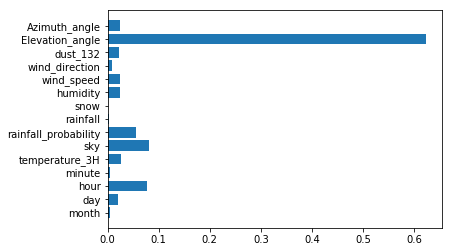

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline
yyyy = modela.feature_importances_
plt.barh(col_list,yyyy)

In [59]:
pred_idx = pd.date_range(start='2019-01-10 00:00:00', end='2019-01-13 23:45:00', freq='15Min')
len(pd.date_range(start='2019-01-10 00:00:00', end='2019-01-13 23:45:00', freq='15Min'))

384

In [60]:
predict = pd.concat([pd.DataFrame(pre_aaa, columns=['A_site'], index=pred_idx),
                     pd.DataFrame(pre_bbb, columns=['B_site'], index=pred_idx),
                     pd.DataFrame(pre_ccc, columns=['C_site'], index=pred_idx)], axis=1)

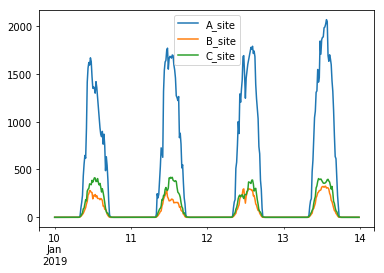

In [61]:
%matplotlib inline
predict.plot()

In [62]:
aaa_original.set_index(aaa_original.time, inplace=True)
bbb_original.set_index(bbb_original.time, inplace=True)
ccc_original.set_index(ccc_original.time, inplace=True)

In [64]:
A_site = pd.concat([pd.DataFrame(aaa_original[38300+96:38300+480].real_time_power),
           pd.DataFrame(predict.A_site)], axis=1)
A_site.columns = ['ACT', 'PRE']

B_site = pd.concat([pd.DataFrame(bbb_original[35103+96:35103+480].real_time_power),
           pd.DataFrame(predict.B_site)], axis=1)
B_site.columns = ['ACT', 'PRE']

C_site = pd.concat([pd.DataFrame(ccc_original[27263+96:27263+480].real_time_power),
           pd.DataFrame(predict.C_site)], axis=1)
C_site.columns = ['ACT', 'PRE']

(<matplotlib.axes._subplots.AxesSubplot at 0x17fc89f8198>,
 <matplotlib.axes._subplots.AxesSubplot at 0x17fc848fe80>)

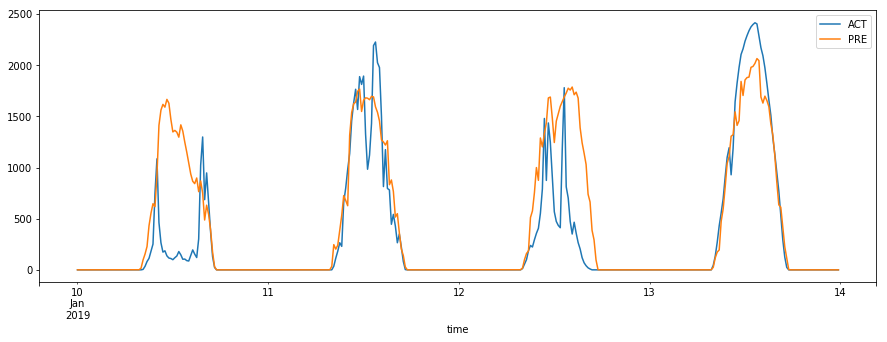

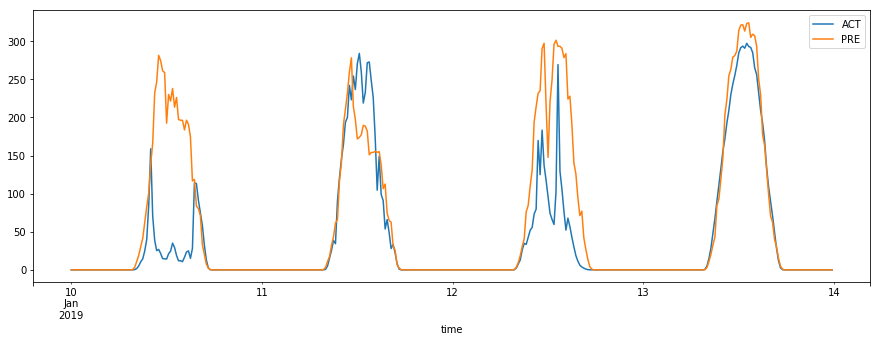

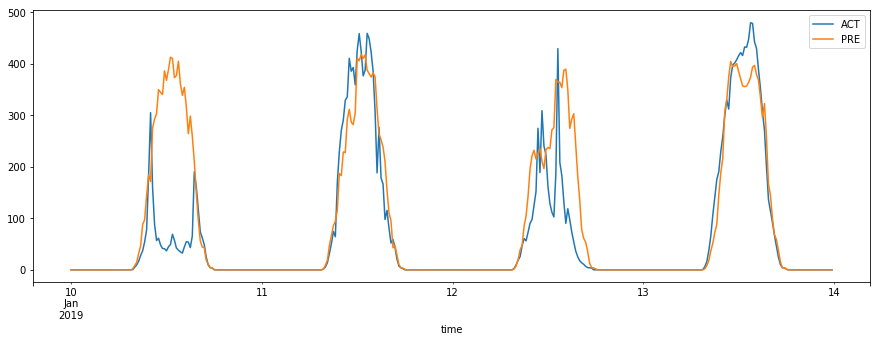

In [65]:
A_site.plot(figsize=(15,5)), B_site.plot(figsize=(15,5)), C_site.plot(figsize=(15,5))

In [66]:
aaa_original.columns[9:]

Index(['temperature_3H', 'sky', 'rainfall_probability', 'rainfall', 'snow',
       'humidity', 'wind_speed', 'wind_direction', 'Elevation_angle',
       'Azimuth_angle', 'dust_132'],
      dtype='object')

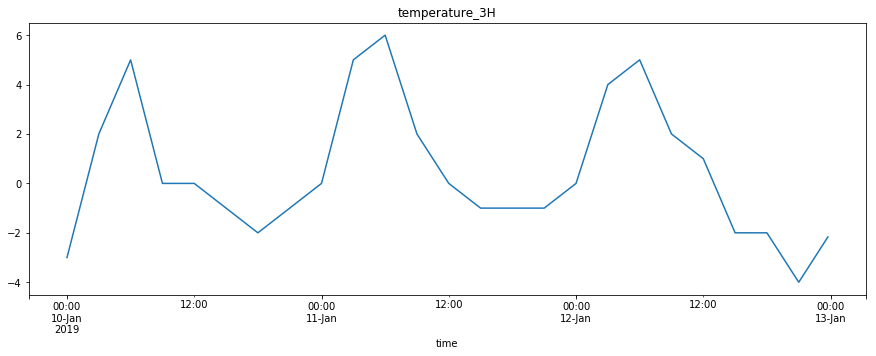

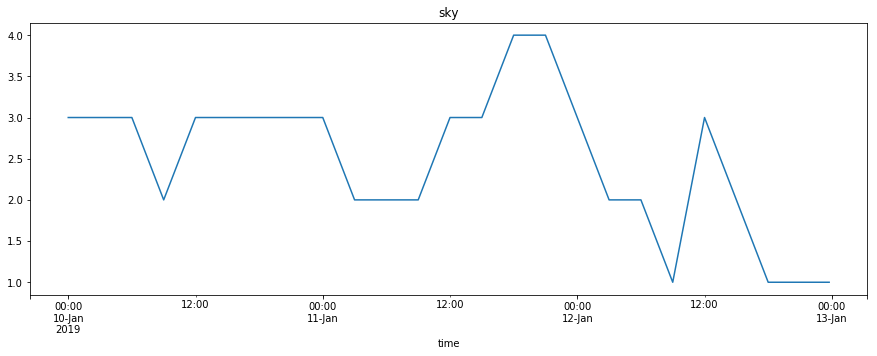

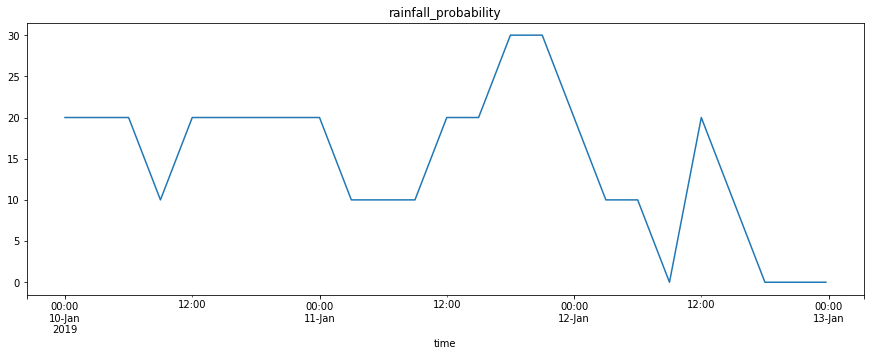

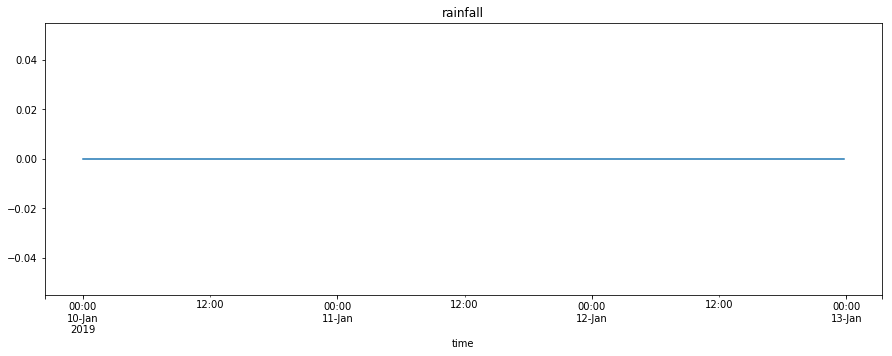

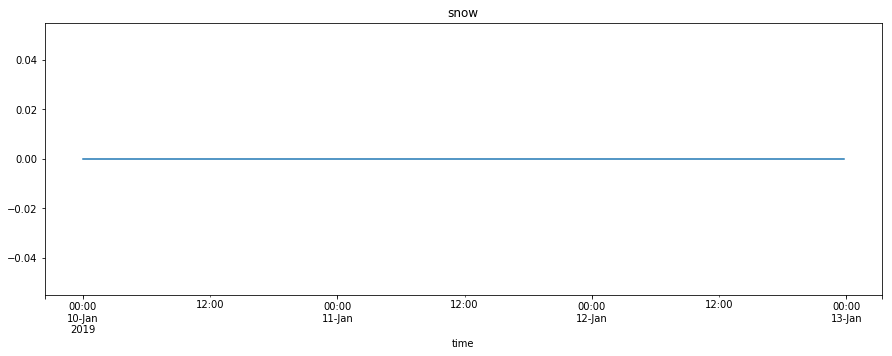

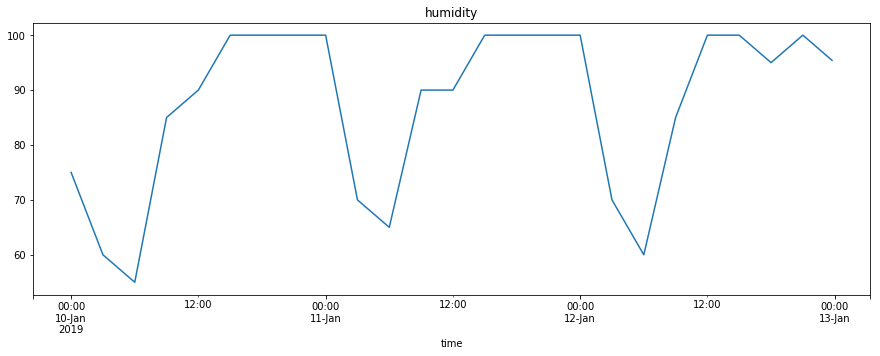

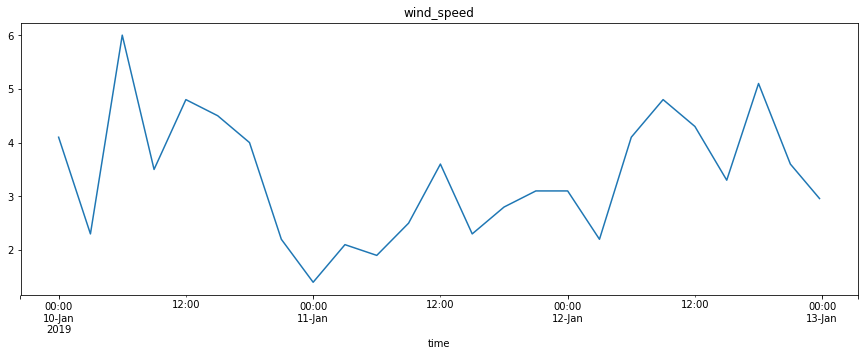

Error. None Numeric.


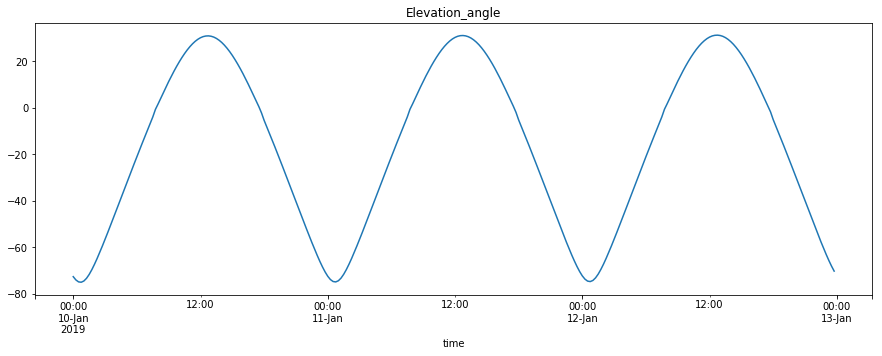

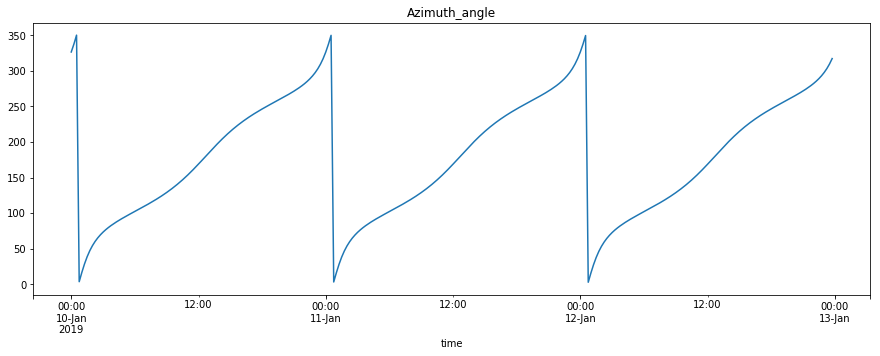

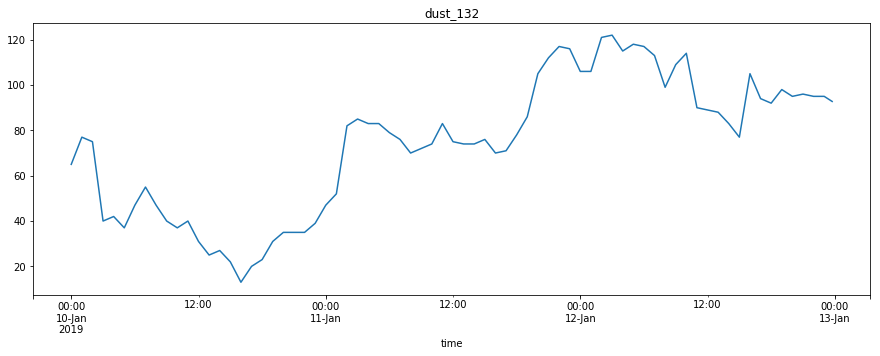

In [69]:
for column in aaa_original.columns[9:]:
    try:
        aaa_original[column][38300+96:38300+384].plot(figsize=(15,5))
        plt.title(column)
        plt.show()
    except:
        print("Error. None Numeric.")